In [1]:
%tensorflow_version 2.x

In [2]:
!wget https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip

--2020-11-24 07:09:13--  https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip [following]
--2020-11-24 07:09:13--  https://www.dropbox.com/s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0ab3644e0d7f01f3b21b62d363.dl.dropboxusercontent.com/cd/0/inline/BDyNiz7gp8Ui3GDvVEIG_ynm_GHinMVUfomlSEHEDTFq45ZF_z2ccV-U9LM1nGcyZLp3_9RRQqfGpGha53eOjtN506jhE12BmAP3w00BNiWxlw/file# [following]
--2020-11-24 07:09:14--  https://uc0ab3644e0d7f01f3b21b62d363.dl.dropboxusercontent.com/cd/0/inline/BDyNiz7gp8Ui3GDvVEIG_ynm_GHinMVUfomlSEHEDTFq4

In [3]:
!unzip '/content/state-farm-distracted-driver-detection.zip'

Archive:  /content/state-farm-distracted-driver-detection.zip
  inflating: sample_submission.csv   
  inflating: driver_imgs_list.csv    
  inflating: imgs.zip                


In [4]:
!unzip '/content/imgs.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/c7/img_56661.jpg  
  inflating: train/c7/img_56699.jpg  
  inflating: train/c7/img_56717.jpg  
  inflating: train/c7/img_56724.jpg  
  inflating: train/c7/img_56768.jpg  
  inflating: train/c7/img_56779.jpg  
  inflating: train/c7/img_56849.jpg  
  inflating: train/c7/img_56899.jpg  
  inflating: train/c7/img_56938.jpg  
  inflating: train/c7/img_5706.jpg   
  inflating: train/c7/img_57076.jpg  
  inflating: train/c7/img_57122.jpg  
  inflating: train/c7/img_57137.jpg  
  inflating: train/c7/img_5715.jpg   
  inflating: train/c7/img_57278.jpg  
  inflating: train/c7/img_57321.jpg  
  inflating: train/c7/img_57345.jpg  
  inflating: train/c7/img_57355.jpg  
  inflating: train/c7/img_5741.jpg   
  inflating: train/c7/img_57433.jpg  
  inflating: train/c7/img_5753.jpg   
  inflating: train/c7/img_57559.jpg  
  inflating: train/c7/img_57594.jpg  
  inflating: train/c7/img_5771.jpg   
  inflating: train/c7/img_57712.jpg  

# Import Libraries

In [5]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout

In [6]:
len(os.listdir('test'))

79726

In [7]:
print(len(os.listdir('/content/train/c0')))
print(len(os.listdir('/content/train/c1')))
print(len(os.listdir('/content/train/c2')))
print(len(os.listdir('/content/train/c3')))
print(len(os.listdir('/content/train/c4')))
print(len(os.listdir('/content/train/c5')))
print(len(os.listdir('/content/train/c6')))
print(len(os.listdir('/content/train/c7')))
print(len(os.listdir('/content/train/c8')))
print(len(os.listdir('/content/train/c9')))

2489
2267
2317
2346
2326
2312
2325
2002
1911
2129


No. of train images = 22,424
No. of test images = 79,726

In [8]:
model=Sequential()
model.add(Conv2D(32,(5,5),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation="relu"))

In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
#Test directory
%mkdir Test

In [13]:
#moving the test images to Test directory
!mv /content/test/  /content/Test

In [14]:
train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        subset='training'
        )

validation_generator = train_datagen.flow_from_directory(
        '/content/train',
         target_size=(64, 64),
         batch_size=32,
        class_mode='categorical',
         subset='validation'
        )


test_generator = test_datagen.flow_from_directory(
    '/content/Test',
        target_size=(64, 64),
        batch_size=2,
        shuffle=False,
        class_mode='categorical'
    
)

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.
Found 79726 images belonging to 1 classes.


In [15]:
type(test_generator)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [16]:
STEPS_PER_EPOCH = train_generator.n//train_generator.batch_size
VALIDATION_STEPS=validation_generator.n//train_generator.batch_size

# Fit

In [17]:
model.fit(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=VALIDATION_STEPS)

Epoch 1/10
560/560 [==============================] - 127s 227ms/step - loss: 2.2601 - accuracy: 0.1834 - val_loss: 2.3414 - val_accuracy: 0.3589
Epoch 2/10
560/560 [==============================] - 127s 227ms/step - loss: 2.0490 - accuracy: 0.3101 - val_loss: 1.7277 - val_accuracy: 0.3699
Epoch 3/10
560/560 [==============================] - 127s 226ms/step - loss: 1.8616 - accuracy: 0.3627 - val_loss: 1.8200 - val_accuracy: 0.3118
Epoch 4/10
560/560 [==============================] - 127s 226ms/step - loss: 2.0242 - accuracy: 0.2641 - val_loss: 2.3293 - val_accuracy: 0.2460
Epoch 5/10
560/560 [==============================] - 127s 226ms/step - loss: 1.9856 - accuracy: 0.2789 - val_loss: 1.7473 - val_accuracy: 0.3676
Epoch 6/10
560/560 [==============================] - 127s 228ms/step - loss: 2.0345 - accuracy: 0.2540 - val_loss: 2.0826 - val_accuracy: 0.2268
Epoch 7/10
560/560 [==============================] - 126s 225ms/step - loss: 1.8964 - accuracy: 0.3344 - val_loss: 1.6134 -

In [18]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, BatchNormalization

In [19]:
mod = Sequential()
mod.add(Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=(64,64,3)))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.3))
mod.add(Conv2D(64,kernel_size=(5,5),activation='relu',padding='same'))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.3))
mod.add(Conv2D(128,kernel_size=(5,5),activation='relu',padding='same'))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.5))
mod.add(Flatten())
mod.add(Dense(units = 512,activation='relu'))
mod.add(BatchNormalization())
mod.add(Dropout(0.5))
mod.add(Dense(units = 128,activation='relu'))
mod.add(Dropout(0.25))
mod.add(Dense(10,activation='softmax'))

In [20]:
mod.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Validate

In [21]:
STEPS_PER_EPOCH = train_generator.n//train_generator.batch_size
VALIDATION_STEPS=validation_generator.n//train_generator.batch_size

In [22]:
model2=mod.fit(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=VALIDATION_STEPS)

Epoch 1/5
560/560 [==============================] - 132s 236ms/step - loss: 1.9746 - accuracy: 0.3458 - val_loss: 1.3574 - val_accuracy: 0.4964
Epoch 2/5
560/560 [==============================] - 133s 237ms/step - loss: 1.1318 - accuracy: 0.5945 - val_loss: 0.6754 - val_accuracy: 0.7819
Epoch 3/5
560/560 [==============================] - 133s 237ms/step - loss: 0.8117 - accuracy: 0.7149 - val_loss: 0.5002 - val_accuracy: 0.8310
Epoch 4/5
560/560 [==============================] - 132s 236ms/step - loss: 0.6473 - accuracy: 0.7778 - val_loss: 0.6043 - val_accuracy: 0.7877
Epoch 5/5
560/560 [==============================] - 132s 236ms/step - loss: 0.5318 - accuracy: 0.8220 - val_loss: 0.3075 - val_accuracy: 0.8958


In [23]:
%matplotlib inline  
import matplotlib.pyplot as plt

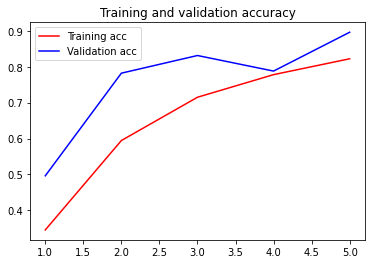

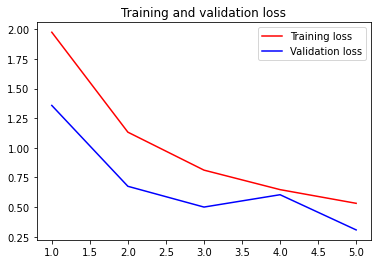

In [24]:
acc = model2.history['accuracy']
val_acc = model2.history['val_accuracy']
loss = model2.history['loss']
val_loss = model2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
#plotting train and validation losses
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [25]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=mod.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

Instructions for updating:
Please use Model.predict, which supports generators.
39863/39863 [==============================] - 471s 12ms/step


In [26]:
pred

array([[2.20597926e-07, 8.66414218e-10, 5.31218063e-07, ...,
        1.29797201e-10, 2.50624964e-07, 9.18535443e-06],
       [2.52441259e-05, 6.44137526e-06, 6.91145469e-05, ...,
        7.72960539e-06, 1.03424449e-04, 9.31243121e-04],
       [4.37332923e-03, 9.87587154e-01, 5.78544568e-04, ...,
        1.17582131e-04, 5.81355591e-04, 3.68938269e-03],
       ...,
       [1.18777473e-02, 1.74302701e-02, 2.16740500e-02, ...,
        3.08347028e-03, 1.05520338e-01, 2.80727088e-01],
       [8.45020054e-07, 1.03879934e-07, 7.67747641e-01, ...,
        8.10897092e-08, 1.48474937e-02, 9.40856751e-07],
       [1.37788757e-05, 1.56714250e-05, 2.21506440e-08, ...,
        8.01934164e-09, 2.17439970e-06, 3.92573467e-03]], dtype=float32)

In [27]:
len(pred)

79726

In [28]:
labels_test_predictions = pd.DataFrame(pred)
labels_test_predictions

,0,1,2,3,4,5,6,7,8,9
0,2.205979e-07,8.664142e-10,5.312181e-07,7.121800e-08,2.887951e-09,0.999990,4.918083e-09,1.297972e-10,2.506250e-07,9.185354e-06
1,2.524413e-05,6.441375e-06,6.911455e-05,1.284911e-04,8.711288e-05,0.998589,5.163256e-05,7.729605e-06,1.034244e-04,9.312431e-04
2,4.373329e-03,9.875872e-01,5.785446e-04,2.333161e-03,3.797637e-04,0.000012,3.474189e-04,1.175821e-04,5.813556e-04,3.689383e-03
3,7.500896e-03,1.776868e-01,3.763762e-01,7.307884e-03,2.786797e-02,0.002795,3.262707e-01,7.109466e-05,6.572973e-02,8.393812e-03
4,2.768543e-03,8.069988e-06,7.632967e-06,7.783445e-01,2.079920e-01,0.008721,1.794522e-04,3.795645e-07,1.189681e-03,7.883247e-04
...,...,...,...,...,...,...,...,...,...,...
79721,3.270106e-04,9.857304e-01,1.259136e-03,6.637445e-06,1.375702e-06,0.000694,2.676367e-04,8.596483e-04,1.178444e-03,9.675667e-03
79722,6.180865e-02,7.060358e-01,7.438490e-03,1.805550e-01,3.676412e-04,0.000334,7.670577e-03,8.829462e-05,2.073333e-03,3.362786e-02
79723,1.187775e-02,1.743027e-02,2.167405e-02,1.523997e-02,4.776395e-01,0.014918,5.188974e-02,3.083470e-03,1.055203e-01,2.807271e-01
79724,8.450201e-07,1.038799e-07,7.677476e-01,1.979239e-10,8.238024e-07,0.000020,2.173825e-01,8.108971e-08,1.484749e-02,9.408568e-07


In [29]:
labels_test_predictions.to_csv('Distracted_Driver_MultiAction_Classification.csv',index=False)

In [30]:
from google.colab import files
files.download("Distracted_Driver_MultiAction_Classification.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>